In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import train

In [2]:
df = pd.read_csv('datasets/BostonHousing.csv')

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: ylabel='Frequency'>

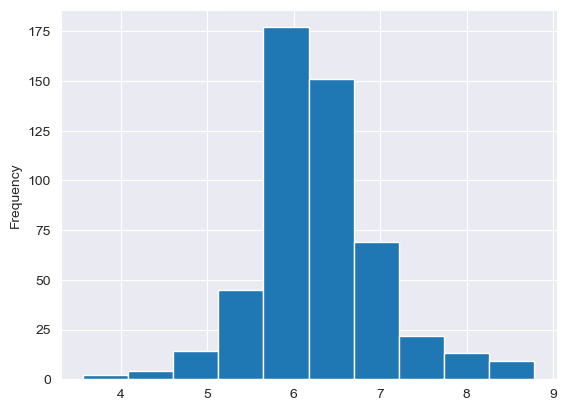

In [6]:
df.rm.plot.hist()

In [7]:
features_without_high_corr = ['dis', 'b', 'lstat', 'tax', 'ptratio']

In [8]:
x = df[features_without_high_corr]
y = df['medv']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
scaler = StandardScaler()

x_train[features_without_high_corr] = scaler.fit_transform(x_train[features_without_high_corr])
x_test[features_without_high_corr] = scaler.transform(x_test[features_without_high_corr])

In [12]:
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

# RIDGE 

In [14]:
ridge = Ridge(alpha=0.2, fit_intercept=False)

ridge.fit(x_train, y_train)

Ridge(alpha=0.2, fit_intercept=False)

In [15]:
y_pred = ridge.predict(x_test)

In [16]:
y_pred = scaler.inverse_transform(y_pred)

In [18]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(4.182411641722001, 31.79740868669369, 0.5987965992932447)

In [19]:
# This is often used in regularization parameter tuning (like Ridge/Lasso regression), where you test different values of alpha from very small to 1.

n_alphas = 200
alphas = np.logspace(-10, 0, n_alphas)

In [20]:
alphas

array([1.00000000e-10, 1.12266777e-10, 1.26038293e-10, 1.41499130e-10,
       1.58856513e-10, 1.78343088e-10, 2.00220037e-10, 2.24780583e-10,
       2.52353917e-10, 2.83309610e-10, 3.18062569e-10, 3.57078596e-10,
       4.00880633e-10, 4.50055768e-10, 5.05263107e-10, 5.67242607e-10,
       6.36824994e-10, 7.14942899e-10, 8.02643352e-10, 9.01101825e-10,
       1.01163798e-09, 1.13573336e-09, 1.27505124e-09, 1.43145894e-09,
       1.60705282e-09, 1.80418641e-09, 2.02550194e-09, 2.27396575e-09,
       2.55290807e-09, 2.86606762e-09, 3.21764175e-09, 3.61234270e-09,
       4.05546074e-09, 4.55293507e-09, 5.11143348e-09, 5.73844165e-09,
       6.44236351e-09, 7.23263390e-09, 8.11984499e-09, 9.11588830e-09,
       1.02341140e-08, 1.14895100e-08, 1.28989026e-08, 1.44811823e-08,
       1.62575567e-08, 1.82518349e-08, 2.04907469e-08, 2.30043012e-08,
       2.58261876e-08, 2.89942285e-08, 3.25508860e-08, 3.65438307e-08,
       4.10265811e-08, 4.60592204e-08, 5.17092024e-08, 5.80522552e-08,
      

In [21]:
# baram najdobar hyperparametar za Ridge - za alpha

coeff = []
scores = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_train, y_train)
    
    coeff.append(ridge.coef_[0][0])
    
    y_pred = ridge.predict(x_test) 
    y_pred = scaler.inverse_transform(y_pred)
    
    scores.append(mean_squared_error(y_test, y_pred))

In [26]:
kernel_ridge = KernelRidge(alpha=1, kernel='linear')

# Repeated K-Fold

In [27]:
cv = KFold(5)

In [33]:
X = scaler.fit_transform(x)
Y = scaler.fit_transform(y.values.reshape(-1, 1))

In [34]:
kernel_ridge.fit(X, Y)

KernelRidge()

In [36]:
y_pred = cross_val_predict(kernel_ridge, X, Y, cv=cv)

In [37]:
y_pred = scaler.inverse_transform(y_pred)

In [43]:
mean_squared_error(y, y_pred)

34.98899875682529

# Kernel Trick

In [44]:
model = KernelRidge(alpha=1, kernel = 'poly', degree=2, coef0=1)

In [46]:
model.fit(X, Y)

KernelRidge(degree=2, kernel='poly')

In [49]:
y_pred = cross_val_predict(model, X=X, y=y, cv=cv)

# Decision Tree
Decision Tree
Some important parameters
criterion: {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error” The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits. Training using “absolute_error” is significantly slower than when using “squared_error”.

splitter: {“best”, “random”}, default=”best” The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth: int, default=None The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: int or float, default=2 The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [53]:
x = df.drop(columns='medv')
y = df['medv']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [56]:
dt = DecisionTreeRegressor(max_depth=100)

dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [57]:
y_pred = dt.predict(x_test)

In [58]:
r2_score(y_test, y_pred)

0.7033355011258823

# Random Forest 

n_estimator: sint, default=100 The number of trees in the forest.

Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.

criterion: {“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}, default=”squared_error” The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits. Training using “absolute_error” is significantly slower than when using “squared_error”.

New in version 0.18: Mean Absolute Error (MAE) criterion.

New in version 1.0: Poisson criterion.

max_dept: hint, default=None The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: int or float, default=2 The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


In [60]:
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=10)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [61]:
y_pred = rf.predict(x_test)

In [62]:
r2_score(y_test, y_pred)

0.8821213321947492